# Visualizing using MNE library

In [2]:
import mne
import numpy as np
import pandas as pd
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt

In [3]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('SMNI_CMI_TRAIN/*.csv')):
    _dfs_list.append(pd.read_csv(csv_filename))
df = pd.concat(_dfs_list)
del(_dfs_list)
df = df.drop(['Unnamed: 0'], axis=1)
df.head(3)

100%|██████████| 468/468 [00:18<00:00, 25.94it/s]


trial number sensor position  sample num  sensor value subject identifier  \
0             0             FP1           0        -8.921                  a   
1             0             FP1           1        -8.433                  a   
2             0             FP1           2        -2.574                  a   

  matching condition  channel         name      time  
0             S1 obj        0  co2a0000364  0.000000  
1             S1 obj        0  co2a0000364  0.003906  
2             S1 obj        0  co2a0000364  0.007812

We need to change the channels to match the MNE library

In [4]:
all_channels = sorted(df['sensor position'].unique())

channel_names = {
    'AFZ':'AFz',
    'CPZ':'CPz',
    'CZ':'Cz',
    'FCZ':'FCz',
    'FP1':'Fp1',
    'FP2':'Fp2',
    'FPZ':'Fpz',
    'FZ':'Fz',
    'OZ':'Oz',
    'POZ':'POz',
    'PZ':'Pz',
}

channel_renamed = {ch: channel_names.get(ch, ch) for ch in all_channels}

df['sensor position'] = df['sensor position'].replace(channel_renamed)

df.head(3)

trial number sensor position  sample num  sensor value subject identifier  \
0             0             Fp1           0        -8.921                  a   
1             0             Fp1           1        -8.433                  a   
2             0             Fp1           2        -2.574                  a   

  matching condition  channel         name      time  
0             S1 obj        0  co2a0000364  0.000000  
1             S1 obj        0  co2a0000364  0.003906  
2             S1 obj        0  co2a0000364  0.007812

Transpose for data extraction later

In [5]:
transposed_df_list = []

for group_df in tqdm(df.groupby(['name', 'trial number', 'matching condition', 'sensor position', 'subject identifier'])):
    _df = pd.DataFrame(group_df[1]['sensor value']).T
    _df.columns = [f'sample_{idx}' for idx in range(256)]
    _df['name'] = group_df[0][0]
    _df['trial number'] = group_df[0][1]
    _df['matching condition'] = group_df[0][2]
    _df['sensor position'] = group_df[0][3]
    _df['subject identifier'] = group_df[0][4]

    transposed_df_list.append(_df)

df = pd.concat(transposed_df_list)
df = df[[*df.columns[-5:],*df.columns[0:-5]]]
df = df.reset_index(drop=True)
df.head(3)

100%|██████████| 29952/29952 [01:10<00:00, 427.15it/s]


name  trial number matching condition sensor position  \
0  co2a0000364             0             S1 obj             AF1   
1  co2a0000364             0             S1 obj             AF2   
2  co2a0000364             0             S1 obj             AF7   

  subject identifier  sample_0  sample_1  sample_2  sample_3  sample_4  ...  \
0                  a    -2.146    -2.146    -1.658    -0.682     2.248  ...   
1                  a     1.129     0.641    -0.336    -0.824     0.641  ...   
2                  a   -16.856    -7.090     7.558    19.277    23.183  ...   

   sample_246  sample_247  sample_248  sample_249  sample_250  sample_251  \
0      -1.658       0.295       2.736       4.201       3.713       1.272   
1       4.059      -0.336      -2.777      -0.824       3.571       5.035   
2      17.324       9.511       1.699      -2.207      -2.207       1.211   

   sample_252  sample_253  sample_254  sample_255  
0      -0.682      -0.193       3.225       7.619  
1       4.059       2.106       1.617       4.059  
2       5.117       8.046      10.000      11.464  

[3 rows x 261 columns]

In [6]:
new_channels = sorted(df['sensor position'].unique())

In [7]:
df[df['subject identifier'].eq('a')]

name  trial number matching condition sensor position  \
0      co2a0000364             0             S1 obj             AF1   
1      co2a0000364             0             S1 obj             AF2   
2      co2a0000364             0             S1 obj             AF7   
3      co2a0000364             0             S1 obj             AF8   
4      co2a0000364             0             S1 obj             AFz   
...            ...           ...                ...             ...   
15035  co2a0000375            47           S2 match             TP7   
15036  co2a0000375            47           S2 match             TP8   
15037  co2a0000375            47           S2 match               X   
15038  co2a0000375            47           S2 match               Y   
15039  co2a0000375            47           S2 match              nd   

      subject identifier  sample_0  sample_1  sample_2  sample_3  sample_4  \
0                      a    -2.146    -2.146    -1.658    -0.682     2.248   
1                      a     1.129     0.641    -0.336    -0.824     0.641   
2                      a   -16.856    -7.090     7.558    19.277    23.183   
3                      a   -10.020    -7.090     1.211    10.488    13.906   
4                      a    -0.987    -1.475    -0.987    -0.010     2.431   
...                  ...       ...       ...       ...       ...       ...   
15035                  a    12.655    13.631    11.678     7.284     2.889   
15036                  a    14.771    12.817    11.353    11.353    11.841   
15037                  a    27.039    24.109    13.367     1.648    -5.188   
15038                  a    15.371    14.394    10.000     3.164    -3.672   
15039                  a    16.225    15.249    13.295    10.854     8.413   

       ...  sample_246  sample_247  sample_248  sample_249  sample_250  \
0      ...      -1.658       0.295       2.736       4.201       3.713   
1      ...       4.059      -0.336      -2.777      -0.824       3.571   
2      ...      17.324       9.511       1.699      -2.207      -2.207   
3      ...      28.554      27.089      15.859       0.722     -10.020   
4      ...       0.478      -0.498      -0.498       0.478       0.966   
...    ...         ...         ...         ...         ...         ...   
15035  ...     -26.896     -26.896     -26.408     -25.431     -24.455   
15036  ...     -24.780     -23.804     -22.339     -20.874     -20.874   
15037  ...     -47.668     -48.157     -51.575     -55.969     -60.364   
15038  ...     -39.805     -39.805     -39.805     -39.317     -39.317   
15039  ...     -27.720     -27.720     -27.232     -26.744     -28.208   

       sample_251  sample_252  sample_253  sample_254  sample_255  
0           1.272      -0.682      -0.193       3.225       7.619  
1           5.035       4.059       2.106       1.617       4.059  
2           1.211       5.117       8.046      10.000      11.464  
3         -10.997      -2.696       9.511      18.789      21.230  
4           0.966       0.966       0.478       2.431       5.361  
...           ...         ...         ...         ...         ...  
15035     -22.990     -21.525     -19.572     -17.619     -17.131  
15036     -22.339     -23.315     -23.804     -24.292     -25.269  
15037     -62.317     -61.340     -57.434     -52.063     -46.692  
15038     -38.829     -36.387     -32.969     -29.063     -27.110  
15039     -29.673     -30.162     -29.185     -27.720     -26.744  

[15040 rows x 261 columns]

In [8]:
df[df['name'].eq('co2c0000338')]['subject identifier'].unique()

array(['c'], dtype=object)

In [9]:
df['name'].unique()

array(['co2a0000364', 'co2a0000365', 'co2a0000368', 'co2a0000369',
       'co2a0000370', 'co2a0000371', 'co2a0000372', 'co2a0000375',
       'co2c0000337', 'co2c0000338', 'co2c0000339', 'co2c0000340',
       'co2c0000341', 'co2c0000342', 'co2c0000344', 'co2c0000345'],
      dtype=object)

In [12]:
df.set_index(['sensor position'])

name  trial number matching condition  \
sensor position                                                 
AF1              co2a0000364             0             S1 obj   
AF2              co2a0000364             0             S1 obj   
AF7              co2a0000364             0             S1 obj   
AF8              co2a0000364             0             S1 obj   
AFz              co2a0000364             0             S1 obj   
...                      ...           ...                ...   
TP7              co2c0000345            47           S2 match   
TP8              co2c0000345            47           S2 match   
X                co2c0000345            47           S2 match   
Y                co2c0000345            47           S2 match   
nd               co2c0000345            47           S2 match   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              a    -2.146    -2.146    -1.658    -0.682   
AF2                              a     1.129     0.641    -0.336    -0.824   
AF7                              a   -16.856    -7.090     7.558    19.277   
AF8                              a   -10.020    -7.090     1.211    10.488   
AFz                              a    -0.987    -1.475    -0.987    -0.010   
...                            ...       ...       ...       ...       ...   
TP7                              c    19.958    18.005    15.564    13.611   
TP8                              c    15.523    13.082     9.176     5.269   
X                                c     9.267     6.826     4.873     2.920   
Y                                c    18.799    16.357    13.916    11.475   
nd                               c    17.171    17.171    15.218    10.824   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 2.248     5.178  ...      -1.658       0.295       2.736   
AF2                 0.641     3.571  ...       4.059      -0.336      -2.777   
AF7                23.183    18.789  ...      17.324       9.511       1.699   
AF8                13.906    10.976  ...      28.554      27.089      15.859   
AFz                 2.431     4.873  ...       0.478      -0.498      -0.498   
...                   ...       ...  ...         ...         ...         ...   
TP7                12.146    10.681  ...      11.169      10.193      10.193   
TP8                 2.340     0.875  ...      -4.496      -4.008      -3.031   
X                  -0.010    -2.452  ...      -6.846      -8.311      -9.288   
Y                   8.545     5.615  ...      -0.244      -1.221      -1.221   
nd                  6.917     3.988  ...      12.777      10.824       9.847   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   4.201       3.713       1.272      -0.682      -0.193   
AF2                  -0.824       3.571       5.035       4.059       2.106   
AF7                  -2.207      -2.207       1.211       5.117       8.046   
AF8                   0.722     -10.020     -10.997      -2.696       9.511   
AFz                   0.478       0.966       0.966       0.966       0.478   
...                     ...         ...         ...         ...         ...   
TP7                  10.681      12.634      15.076      16.541      17.517   
TP8                  -1.567       0.387       1.363       0.875      -2.055   
X                    -8.799      -6.358      -4.405      -3.916      -6.358   
Y                     0.732       4.150       7.080       8.545       7.568   
nd                   10.335      11.312      12.288      12.777      11.312   

                 sample_254  sample_255  
sensor position                          
AF1       

In [13]:
df.index

RangeIndex(start=0, stop=29952, step=1)

In [16]:
df.columns

Index(['name', 'trial number', 'matching condition', 'sensor position',
       'subject identifier', 'sample_0', 'sample_1', 'sample_2', 'sample_3',
       'sample_4',
       ...
       'sample_246', 'sample_247', 'sample_248', 'sample_249', 'sample_250',
       'sample_251', 'sample_252', 'sample_253', 'sample_254', 'sample_255'],
      dtype='object', length=261)

In [17]:
df['trial number'].unique()

array([  0,   2,   7,   9,  10,  12,  14,  15,  17,  18,  19,  20,  22,
        23,  24,  25,  27,  28,  31,  37,  39,  41,  43,  45,  47,  49,
        55,  57,  59,  61,   4,   5,   6,   8,  11,  16,  26,  29,  33,
        35,  51,  71,   3,  13,  65,  21,  30,  32,  34,  36,  53,  67,
        73,  83,  87,  89,  75,  77,  79,  63,  97, 107], dtype=int64)

In [18]:
df['subject identifier'].unique()

array(['a', 'c'], dtype=object)

In [19]:
df[df['trial number'].eq(0) & df['subject identifier'].eq('a')].set_index(['sensor position'])

name  trial number matching condition  \
sensor position                                                 
AF1              co2a0000364             0             S1 obj   
AF2              co2a0000364             0             S1 obj   
AF7              co2a0000364             0             S1 obj   
AF8              co2a0000364             0             S1 obj   
AFz              co2a0000364             0             S1 obj   
...                      ...           ...                ...   
TP7              co2a0000375             0             S1 obj   
TP8              co2a0000375             0             S1 obj   
X                co2a0000375             0             S1 obj   
Y                co2a0000375             0             S1 obj   
nd               co2a0000375             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              a    -2.146    -2.146    -1.658    -0.682   
AF2                              a     1.129     0.641    -0.336    -0.824   
AF7                              a   -16.856    -7.090     7.558    19.277   
AF8                              a   -10.020    -7.090     1.211    10.488   
AFz                              a    -0.987    -1.475    -0.987    -0.010   
...                            ...       ...       ...       ...       ...   
TP7                              a     2.075     3.540     5.493     6.470   
TP8                              a     5.361     6.337     6.337     5.361   
X                                a    -3.937    -1.007     0.458    -0.031   
Y                                a     1.790     3.743     5.208     5.697   
nd                               a     4.832     7.762    11.668    14.598   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 2.248     5.178  ...      -1.658       0.295       2.736   
AF2                 0.641     3.571  ...       4.059      -0.336      -2.777   
AF7                23.183    18.789  ...      17.324       9.511       1.699   
AF8                13.906    10.976  ...      28.554      27.089      15.859   
AFz                 2.431     4.873  ...       0.478      -0.498      -0.498   
...                   ...       ...  ...         ...         ...         ...   
TP7                 7.446     7.935  ...       2.563       3.540       3.052   
TP8                 3.408     0.966  ...      -3.428      -0.987      -0.010   
X                  -2.960    -6.866  ...      12.665      13.153      12.177   
Y                   4.232     2.767  ...      23.275      21.322      19.857   
nd                 17.039    18.016  ...      -6.887      -3.957      -2.492   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   4.201       3.713       1.272      -0.682      -0.193   
AF2                  -0.824       3.571       5.035       4.059       2.106   
AF7                  -2.207      -2.207       1.211       5.117       8.046   
AF8                   0.722     -10.020     -10.997      -2.696       9.511   
AFz                   0.478       0.966       0.966       0.966       0.478   
...                     ...         ...         ...         ...         ...   
TP7                   2.563       2.563       3.052       3.052       2.075   
TP8                  -0.987      -2.940      -4.405      -5.381      -4.893   
X                     9.735       6.805       5.829       7.294      10.223   
Y                    18.880      18.880      19.368      19.857      18.392   
nd                   -4.445      -7.375      -9.328      -9.816      -9.816   

                 sample_254  sample_255  
sensor position                          
AF1       

In [22]:
df[df['trial number'].eq(0) & df['subject identifier'].eq('a')].set_index(['sensor position']).loc[new_channels]

name  trial number matching condition  \
sensor position                                                 
AF1              co2a0000364             0             S1 obj   
AF1              co2a0000368             0             S1 obj   
AF1              co2a0000369             0             S1 obj   
AF1              co2a0000370             0             S1 obj   
AF1              co2a0000371             0             S1 obj   
...                      ...           ...                ...   
nd               co2a0000369             0             S1 obj   
nd               co2a0000370             0             S1 obj   
nd               co2a0000371             0             S1 obj   
nd               co2a0000372             0             S1 obj   
nd               co2a0000375             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              a    -2.146    -2.146    -1.658    -0.682   
AF1                              a     4.079     3.591     2.126     0.173   
AF1                              a     1.617     1.129     1.129     1.129   
AF1                              a    -0.183     1.282     3.723     6.653   
AF1                              a    -0.071    -1.048    -2.024    -3.001   
...                            ...       ...       ...       ...       ...   
nd                               a    -2.350     1.556     2.533     0.092   
nd                               a     3.764     2.299    -0.142    -1.607   
nd                               a    -1.180    -1.180    -1.180    -1.668   
nd                               a    -1.099     1.343     3.296     3.784   
nd                               a     4.832     7.762    11.668    14.598   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 2.248     5.178  ...      -1.658       0.295       2.736   
AF1                -0.315    -0.315  ...     -10.081      -9.593      -9.593   
AF1                 0.641     0.641  ...       2.594       3.571       4.547   
AF1                 9.583    11.047  ...      -4.089      -5.554      -7.996   
AF1                -2.024    -0.559  ...      -6.907      -7.884      -7.884   
...                   ...       ...  ...         ...         ...         ...   
nd                 -3.815    -6.256  ...     -16.998     -17.487     -16.510   
nd                 -2.584    -1.607  ...       6.205       6.205       3.764   
nd                 -1.180    -0.692  ...      -9.481     -11.434     -11.434   
nd                  3.296     2.319  ...       9.644       9.644       9.644   
nd                 17.039    18.016  ...      -6.887      -3.957      -2.492   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   4.201       3.713       1.272      -0.682      -0.193   
AF1                 -10.081     -11.058     -11.546     -11.058     -11.058   
AF1                   3.571       2.594       0.641      -0.336      -0.824   
AF1                 -10.437     -11.902     -10.925      -8.484      -5.066   
AF1                  -6.419      -4.954      -4.466      -4.954      -5.442   
...                     ...         ...         ...         ...         ...   
nd                  -15.045     -13.092     -10.651      -7.721      -3.815   
nd                    1.322       1.322       3.764       7.182       9.135   
nd                   -8.993      -6.063      -4.110      -3.133      -4.598   
nd                    9.644       9.644       9.155       8.667       8.667   
nd                   -4.445      -7.375      -9.328      -9.816      -9.816   

                 sample_254  sample_255  
sensor position                          
AF1       

In [40]:
def get_record_df(df, channel_list):
    dfs = dict()
    for trial_number in list(df['trial number'].unique()):
        dfs[trial_number] = dict()
        print(trial_number)
        if(len(df[df['trial number'].eq(trial_number) & df['subject identifier'].eq('a')])):
            alcoholic_df = df[df['trial number'].eq(trial_number) & df['subject identifier'].eq('a')].set_index(['sensor position']).loc[channel_list]
            dfs[trial_number]['alcoholics'] = alcoholic_df
            #print('alcoholic')
        if(len(df[df['trial number'].eq(trial_number) & df['subject identifier'].ne('a')])):
            control_df = df[df['trial number'].eq(trial_number) & df['subject identifier'].ne('a')].set_index(['sensor position']).loc[channel_list]
            dfs[trial_number]['control'] = control_df
            #print('control')
    return dfs

dfs = get_record_df(df, new_channels)
dfs

0
2
7
9
10
12
14
15
17
18
19
20
22
23
24
25
27
28
31
37
39
41
43
45
47
49
55
57
59
61
4
5
6
8
11
16
26
29
33
35
51
71
3
13
65
21
30
32
34
36
53
67
73
83
87
89
75
77
79
63
97
107


{0: {'alcoholics':                         name  trial number matching condition  \
  sensor position                                                 
  AF1              co2a0000364             0             S1 obj   
  AF1              co2a0000368             0             S1 obj   
  AF1              co2a0000369             0             S1 obj   
  AF1              co2a0000370             0             S1 obj   
  AF1              co2a0000371             0             S1 obj   
  ...                      ...           ...                ...   
  nd               co2a0000369             0             S1 obj   
  nd               co2a0000370             0             S1 obj   
  nd               co2a0000371             0             S1 obj   
  nd               co2a0000372             0             S1 obj   
  nd               co2a0000375             0             S1 obj   
  
                  subject identifier  sample_0  sample_1  sample_2  sample_3  \
  sensor position            

In [42]:
len(dfs[0].items())

2

In [44]:
dfs[0]['alcoholics']

name  trial number matching condition  \
sensor position                                                 
AF1              co2a0000364             0             S1 obj   
AF1              co2a0000368             0             S1 obj   
AF1              co2a0000369             0             S1 obj   
AF1              co2a0000370             0             S1 obj   
AF1              co2a0000371             0             S1 obj   
...                      ...           ...                ...   
nd               co2a0000369             0             S1 obj   
nd               co2a0000370             0             S1 obj   
nd               co2a0000371             0             S1 obj   
nd               co2a0000372             0             S1 obj   
nd               co2a0000375             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              a    -2.146    -2.146    -1.658    -0.682   
AF1                              a     4.079     3.591     2.126     0.173   
AF1                              a     1.617     1.129     1.129     1.129   
AF1                              a    -0.183     1.282     3.723     6.653   
AF1                              a    -0.071    -1.048    -2.024    -3.001   
...                            ...       ...       ...       ...       ...   
nd                               a    -2.350     1.556     2.533     0.092   
nd                               a     3.764     2.299    -0.142    -1.607   
nd                               a    -1.180    -1.180    -1.180    -1.668   
nd                               a    -1.099     1.343     3.296     3.784   
nd                               a     4.832     7.762    11.668    14.598   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 2.248     5.178  ...      -1.658       0.295       2.736   
AF1                -0.315    -0.315  ...     -10.081      -9.593      -9.593   
AF1                 0.641     0.641  ...       2.594       3.571       4.547   
AF1                 9.583    11.047  ...      -4.089      -5.554      -7.996   
AF1                -2.024    -0.559  ...      -6.907      -7.884      -7.884   
...                   ...       ...  ...         ...         ...         ...   
nd                 -3.815    -6.256  ...     -16.998     -17.487     -16.510   
nd                 -2.584    -1.607  ...       6.205       6.205       3.764   
nd                 -1.180    -0.692  ...      -9.481     -11.434     -11.434   
nd                  3.296     2.319  ...       9.644       9.644       9.644   
nd                 17.039    18.016  ...      -6.887      -3.957      -2.492   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   4.201       3.713       1.272      -0.682      -0.193   
AF1                 -10.081     -11.058     -11.546     -11.058     -11.058   
AF1                   3.571       2.594       0.641      -0.336      -0.824   
AF1                 -10.437     -11.902     -10.925      -8.484      -5.066   
AF1                  -6.419      -4.954      -4.466      -4.954      -5.442   
...                     ...         ...         ...         ...         ...   
nd                  -15.045     -13.092     -10.651      -7.721      -3.815   
nd                    1.322       1.322       3.764       7.182       9.135   
nd                   -8.993      -6.063      -4.110      -3.133      -4.598   
nd                    9.644       9.644       9.155       8.667       8.667   
nd                   -4.445      -7.375      -9.328      -9.816      -9.816   

                 sample_254  sample_255  
sensor position                          
AF1       

In [45]:
dfs[0]['control']

name  trial number matching condition  \
sensor position                                                 
AF1              co2c0000337             0             S1 obj   
AF1              co2c0000338             0             S1 obj   
AF1              co2c0000339             0             S1 obj   
AF1              co2c0000340             0             S1 obj   
AF1              co2c0000341             0             S1 obj   
...                      ...           ...                ...   
nd               co2c0000339             0             S1 obj   
nd               co2c0000340             0             S1 obj   
nd               co2c0000341             0             S1 obj   
nd               co2c0000344             0             S1 obj   
nd               co2c0000345             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              c    -0.020     0.468     1.445     2.909   
AF1                              c    -1.149    -1.638    -2.126    -3.591   
AF1                              c    -0.865    -0.376     0.600     2.065   
AF1                              c    -3.031    -2.543    -0.590     0.875   
AF1                              c    -4.313    -3.825    -1.872    -0.407   
...                            ...       ...       ...       ...       ...   
nd                               c     3.011     3.499     4.476     5.452   
nd                               c    -1.434    -1.434     0.519     1.984   
nd                               c    -6.795    -5.330    -3.866    -1.424   
nd                               c    -7.904    -9.857   -12.299   -13.275   
nd                               c     9.359     6.917     2.035    -2.848   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 3.886     4.374  ...       2.909       1.933       1.933   
AF1                -4.567    -5.056  ...     -16.774     -15.798     -15.310   
AF1                 3.530     4.995  ...       3.530       4.018       4.506   
AF1                -0.102    -3.520  ...      13.570      11.617       9.664   
AF1                -0.895    -3.337  ...     -19.450     -20.915     -19.938   
...                   ...       ...  ...         ...         ...         ...   
nd                  5.941     5.941  ...      -0.407       1.058       1.546   
nd                  1.007    -2.411  ...      13.214      10.284       6.866   
nd                 -1.424    -2.889  ...     -20.467     -22.909     -21.932   
nd                -12.787   -11.322  ...       4.303       4.303       3.815   
nd                 -5.290    -4.313  ...      -5.290      -4.313      -1.383   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   2.909       3.886       3.886       2.909       1.933   
AF1                 -15.798     -17.263     -17.751     -17.751     -16.774   
AF1                   4.506       3.530       2.065       1.088      -0.376   
AF1                   8.199       7.222       6.246       5.269       4.293   
AF1                 -17.497     -14.567     -12.614     -13.102     -14.567   
...                     ...         ...         ...         ...         ...   
nd                    1.058      -0.895      -2.360      -3.825      -4.313   
nd                    4.425       2.960       2.472       1.984       1.007   
nd                  -18.514     -14.119     -12.166     -12.655     -15.584   
nd                    4.303       5.280       6.744       8.209       8.698   
nd                    1.058       3.011       3.499       3.011       2.523   

                 sample_254  sample_255  
sensor position                          
AF1       

In [59]:
dfs[0]['control'][dfs[0]['control'].name == 'co2c0000337']

name  trial number matching condition  \
sensor position                                                 
AF1              co2c0000337             0             S1 obj   
AF2              co2c0000337             0             S1 obj   
AF7              co2c0000337             0             S1 obj   
AF8              co2c0000337             0             S1 obj   
AFz              co2c0000337             0             S1 obj   
...                      ...           ...                ...   
TP7              co2c0000337             0             S1 obj   
TP8              co2c0000337             0             S1 obj   
X                co2c0000337             0             S1 obj   
Y                co2c0000337             0             S1 obj   
nd               co2c0000337             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              c    -0.020     0.468     1.445     2.909   
AF2                              c    -6.032    -6.521    -5.544    -2.614   
AF7                              c    11.902    10.437     7.507     5.554   
AF8                              c    -9.959   -11.912   -12.400    -8.982   
AFz                              c    -2.472    -2.472    -1.007     0.946   
...                            ...       ...       ...       ...       ...   
TP7                              c     9.359     7.406     4.476     3.011   
TP8                              c   -19.552   -16.134    -9.786    -3.927   
X                                c     4.405     1.963    -2.431    -3.896   
Y                                c    26.194    24.729    18.870    13.499   
nd                               c     2.797     2.309     1.821     1.821   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 3.886     4.374  ...       2.909       1.933       1.933   
AF2                 0.804     3.245  ...       5.198       4.222       4.710   
AF7                 5.554     6.531  ...       1.160      -0.793      -0.793   
AF8                -3.123     1.760  ...       4.690       5.178       8.107   
AFz                 3.387     5.341  ...      19.012      18.036      18.524   
...                   ...       ...  ...         ...         ...         ...   
TP7                 4.476     7.894  ...      -8.708     -11.637     -11.637   
TP8                -1.485    -2.462  ...      -8.321     -10.763     -12.716   
X                  -2.431     0.010  ...      12.217       9.776      11.729   
Y                  12.034    14.964  ...      10.569       8.616       8.616   
nd                  3.286     4.262  ...       5.727       4.262       4.262   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   2.909       3.886       3.886       2.909       1.933   
AF2                   6.175       7.151       7.640       6.663       5.198   
AF7                   1.160       3.113       4.089       4.578       4.578   
AF8                  12.014      13.479      13.479      11.037       9.084   
AFz                  19.501      20.477      20.477      19.989      19.012   
...                     ...         ...         ...         ...         ...   
TP7                  -9.684      -6.755      -4.313      -2.360      -2.848   
TP8                 -14.669     -16.622     -16.622     -14.669     -10.274   
X                    14.659      17.100      17.100      16.123      14.659   
Y                    10.081      13.011      14.476      15.452      14.964   
nd                    5.239       6.215       6.704       5.727       4.751   

                 sample_254  sample_255  
sensor position                          
AF1       

In [61]:
dfs[0]['control'][dfs[0]['control'].name == 'co2c0000337']

name  trial number matching condition  \
sensor position                                                 
AF1              co2c0000337             0             S1 obj   
AF2              co2c0000337             0             S1 obj   
AF7              co2c0000337             0             S1 obj   
AF8              co2c0000337             0             S1 obj   
AFz              co2c0000337             0             S1 obj   
...                      ...           ...                ...   
TP7              co2c0000337             0             S1 obj   
TP8              co2c0000337             0             S1 obj   
X                co2c0000337             0             S1 obj   
Y                co2c0000337             0             S1 obj   
nd               co2c0000337             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              c    -0.020     0.468     1.445     2.909   
AF2                              c    -6.032    -6.521    -5.544    -2.614   
AF7                              c    11.902    10.437     7.507     5.554   
AF8                              c    -9.959   -11.912   -12.400    -8.982   
AFz                              c    -2.472    -2.472    -1.007     0.946   
...                            ...       ...       ...       ...       ...   
TP7                              c     9.359     7.406     4.476     3.011   
TP8                              c   -19.552   -16.134    -9.786    -3.927   
X                                c     4.405     1.963    -2.431    -3.896   
Y                                c    26.194    24.729    18.870    13.499   
nd                               c     2.797     2.309     1.821     1.821   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 3.886     4.374  ...       2.909       1.933       1.933   
AF2                 0.804     3.245  ...       5.198       4.222       4.710   
AF7                 5.554     6.531  ...       1.160      -0.793      -0.793   
AF8                -3.123     1.760  ...       4.690       5.178       8.107   
AFz                 3.387     5.341  ...      19.012      18.036      18.524   
...                   ...       ...  ...         ...         ...         ...   
TP7                 4.476     7.894  ...      -8.708     -11.637     -11.637   
TP8                -1.485    -2.462  ...      -8.321     -10.763     -12.716   
X                  -2.431     0.010  ...      12.217       9.776      11.729   
Y                  12.034    14.964  ...      10.569       8.616       8.616   
nd                  3.286     4.262  ...       5.727       4.262       4.262   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   2.909       3.886       3.886       2.909       1.933   
AF2                   6.175       7.151       7.640       6.663       5.198   
AF7                   1.160       3.113       4.089       4.578       4.578   
AF8                  12.014      13.479      13.479      11.037       9.084   
AFz                  19.501      20.477      20.477      19.989      19.012   
...                     ...         ...         ...         ...         ...   
TP7                  -9.684      -6.755      -4.313      -2.360      -2.848   
TP8                 -14.669     -16.622     -16.622     -14.669     -10.274   
X                    14.659      17.100      17.100      16.123      14.659   
Y                    10.081      13.011      14.476      15.452      14.964   
nd                    5.239       6.215       6.704       5.727       4.751   

                 sample_254  sample_255  
sensor position                          
AF1       

In [62]:
dfs[0]['alcoholics'][dfs[0]['alcoholics'].name == 'co2a0000364']

name  trial number matching condition  \
sensor position                                                 
AF1              co2a0000364             0             S1 obj   
AF2              co2a0000364             0             S1 obj   
AF7              co2a0000364             0             S1 obj   
AF8              co2a0000364             0             S1 obj   
AFz              co2a0000364             0             S1 obj   
...                      ...           ...                ...   
TP7              co2a0000364             0             S1 obj   
TP8              co2a0000364             0             S1 obj   
X                co2a0000364             0             S1 obj   
Y                co2a0000364             0             S1 obj   
nd               co2a0000364             0             S1 obj   

                subject identifier  sample_0  sample_1  sample_2  sample_3  \
sensor position                                                              
AF1                              a    -2.146    -2.146    -1.658    -0.682   
AF2                              a     1.129     0.641    -0.336    -0.824   
AF7                              a   -16.856    -7.090     7.558    19.277   
AF8                              a   -10.020    -7.090     1.211    10.488   
AFz                              a    -0.987    -1.475    -0.987    -0.010   
...                            ...       ...       ...       ...       ...   
TP7                              a    -9.338   -12.268    -8.850    -1.526   
TP8                              a    -3.082    -4.059    -3.571    -1.129   
X                                a    -5.269    -5.758    -2.828     1.567   
Y                                a    -5.636    -2.706     1.689     5.595   
nd                               a    -8.901    -7.924    -3.042     4.771   

                 sample_4  sample_5  ...  sample_246  sample_247  sample_248  \
sensor position                      ...                                       
AF1                 2.248     5.178  ...      -1.658       0.295       2.736   
AF2                 0.641     3.571  ...       4.059      -0.336      -2.777   
AF7                23.183    18.789  ...      17.324       9.511       1.699   
AF8                13.906    10.976  ...      28.554      27.089      15.859   
AFz                 2.431     4.873  ...       0.478      -0.498      -0.498   
...                   ...       ...  ...         ...         ...         ...   
TP7                 4.822     7.263  ...      19.958      14.587       3.357   
TP8                 2.777     6.195  ...       2.777       2.289       0.824   
X                   5.961     9.379  ...      19.145      18.168      16.215   
Y                   9.013    10.478  ...      24.150      20.243      11.454   
nd                 11.607    14.048  ...      11.119       8.677       5.259   

                 sample_249  sample_250  sample_251  sample_252  sample_253  \
sensor position                                                               
AF1                   4.201       3.713       1.272      -0.682      -0.193   
AF2                  -0.824       3.571       5.035       4.059       2.106   
AF7                  -2.207      -2.207       1.211       5.117       8.046   
AF8                   0.722     -10.020     -10.997      -2.696       9.511   
AFz                   0.478       0.966       0.966       0.966       0.478   
...                     ...         ...         ...         ...         ...   
TP7                  -6.897      -9.827      -3.967       6.775      14.587   
TP8                   0.336       1.312       3.265       4.242       2.777   
X                    13.774      10.844       8.891       8.891      11.820   
Y                     4.618       3.153       6.571      12.431      15.849   
nd                    2.818       2.330       3.306       4.283       4.771   

                 sample_254  sample_255  
sensor position                          
AF1       

In [60]:
dfs[0]['alcoholics'].name.unique()

array(['co2a0000364', 'co2a0000368', 'co2a0000369', 'co2a0000370',
       'co2a0000371', 'co2a0000372', 'co2a0000375'], dtype=object)

In [63]:
def get_signal_array(df_alcoholics, df_control):
    return df_alcoholics.to_numpy()[:, 4:], df_control.to_numpy()[:, 4:]

signal_array_alcoholics, signal_array_control = get_signal_array(dfs[0]['alcoholics'][dfs[0]['alcoholics'].name == 'co2a0000364'], dfs[0]['control'][dfs[0]['control'].name == 'co2c0000337'])
signal_array_alcoholics.shape

(64, 256)

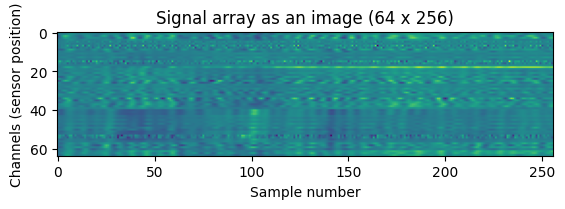

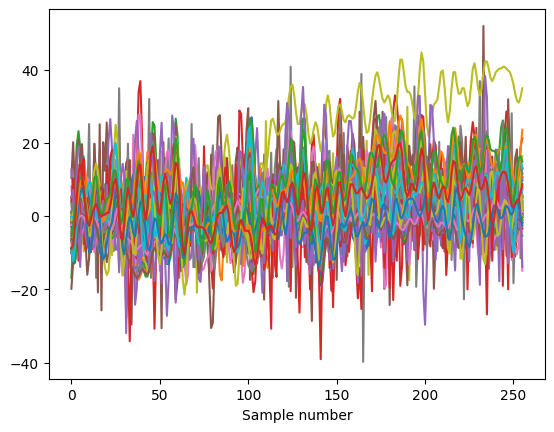

In [64]:
plt.title('Signal array as an image (64 x 256)')
plt.ylabel('Channels (sensor position)');
plt.xlabel('Sample number');
plt.imshow(signal_array_alcoholics.astype(float));
plt.show()

#channels_to_display = ['AF1', 'CP3', 'F1']
for channel in new_channels:
    plt.xlabel('Sample number');
    plt.plot(signal_array_alcoholics[new_channels.index(channel)]);
#plt.legend(new_channels);

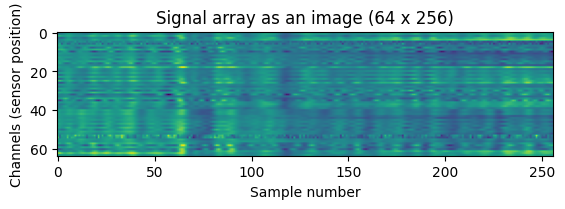

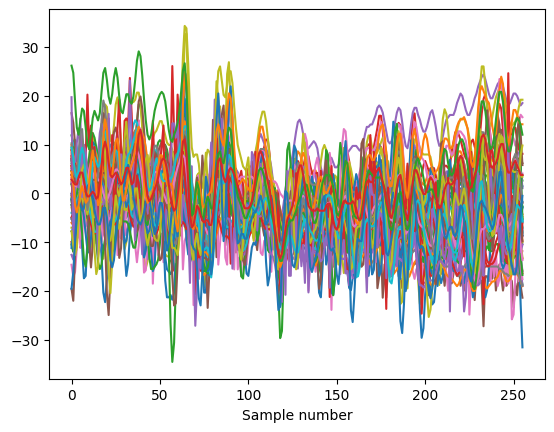

In [65]:
plt.title('Signal array as an image (64 x 256)')
plt.ylabel('Channels (sensor position)');
plt.xlabel('Sample number');
plt.imshow(signal_array_control.astype(float));
plt.show()

#channels_to_display = ['AF1', 'CP3', 'F1']
for channel in new_channels:
    plt.xlabel('Sample number');
    plt.plot(signal_array_control[new_channels.index(channel)]);
#plt.legend(new_channels);

In [66]:
info = mne.create_info(ch_names=new_channels, sfreq=256, ch_types=['eeg']*64)
raw_alcoholic = mne.io.RawArray(signal_array_alcoholics, info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw_alcoholic.drop_channels(['X', 'Y', 'nd'])
raw_alcoholic.set_montage(standard_1020_montage)

Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.


<RawArray | 61 x 256 (1.0 s), ~209 kB, data loaded>

In [67]:
info = mne.create_info(ch_names=new_channels, sfreq=256, ch_types=['eeg']*64)
raw_control = mne.io.RawArray(signal_array_control, info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw_control.drop_channels(['X', 'Y', 'nd'])
raw_control.set_montage(standard_1020_montage)

Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.


<RawArray | 61 x 256 (1.0 s), ~209 kB, data loaded>

# ICA

C:\Users\Asia\AppData\Local\Temp\ipykernel_6396\3961873465.py:2: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  ica.fit(raw_alcoholic.copy().filter(1,None, verbose=False), verbose=False)
c:\Users\Asia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


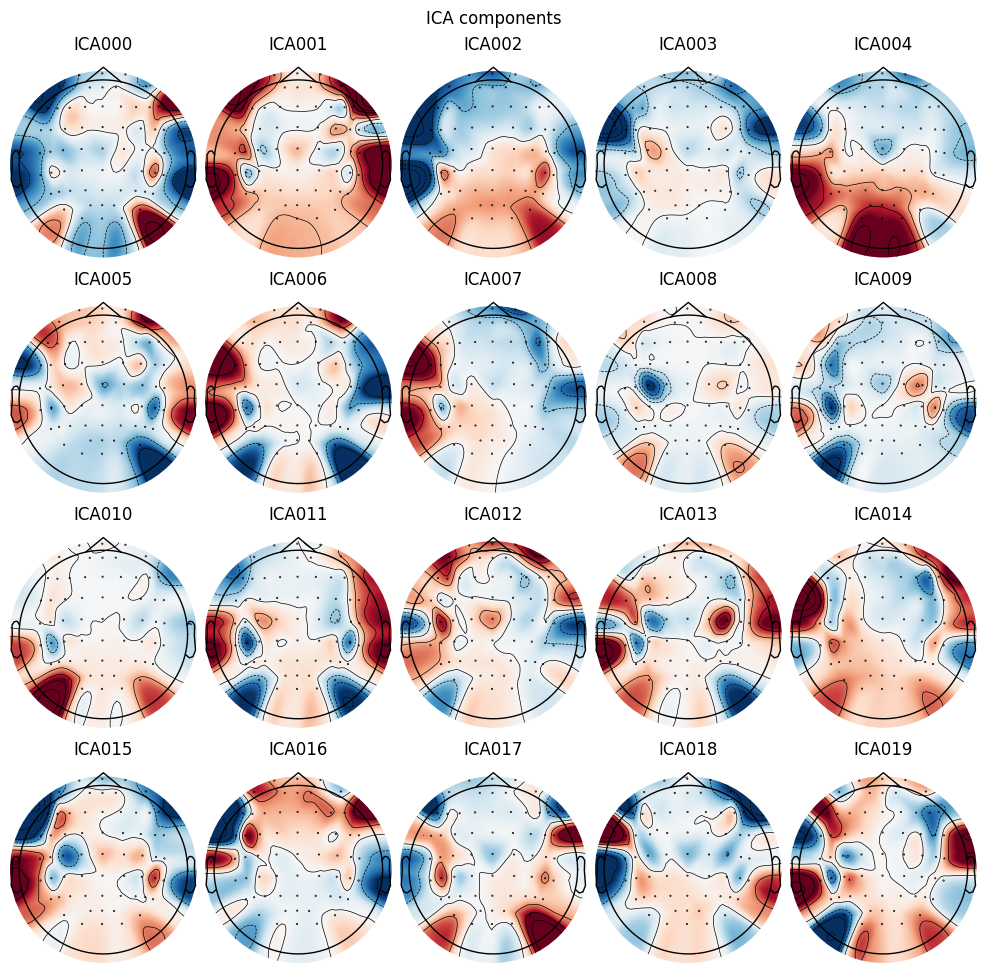

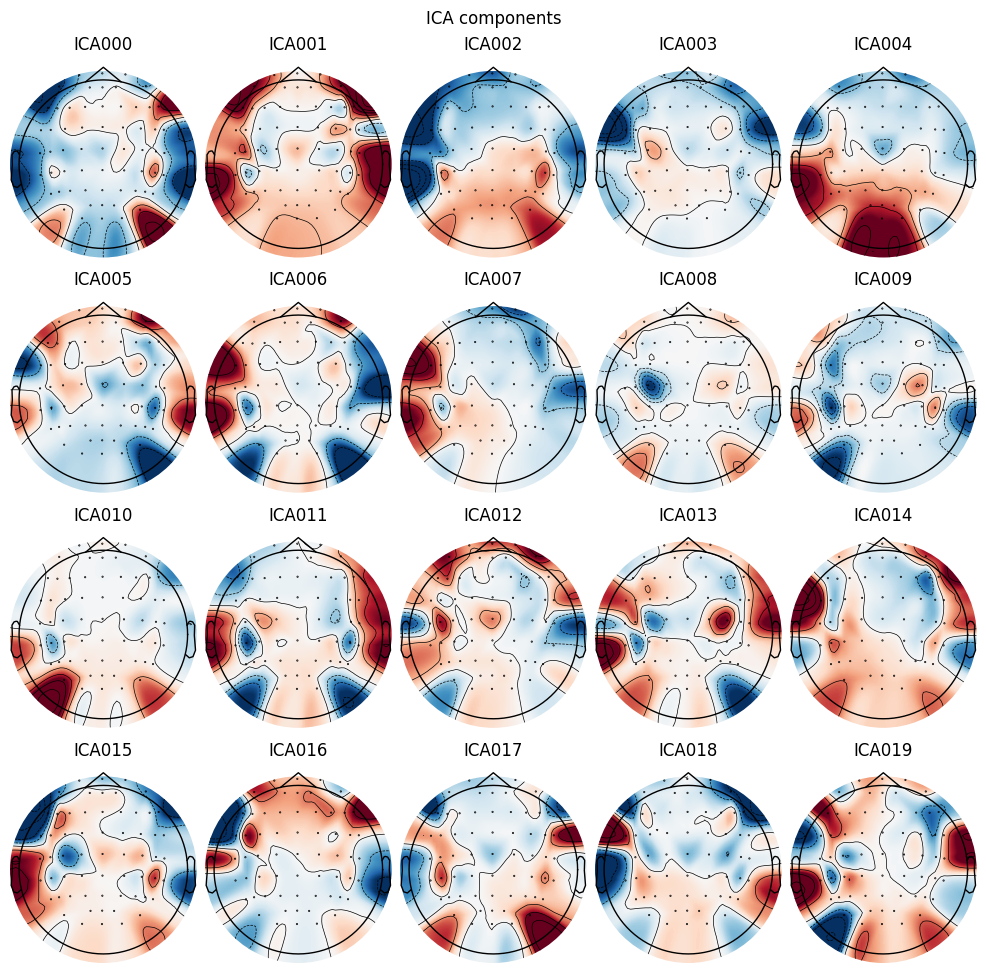

In [72]:
ica = mne.preprocessing.ICA(random_state=42, n_components=20)
ica.fit(raw_alcoholic.copy().filter(1,None, verbose=False), verbose=False)
ica.plot_components()

C:\Users\Asia\AppData\Local\Temp\ipykernel_6396\3232383883.py:2: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  ica.fit(raw_control.copy().filter(1,None, verbose=False), verbose=False)


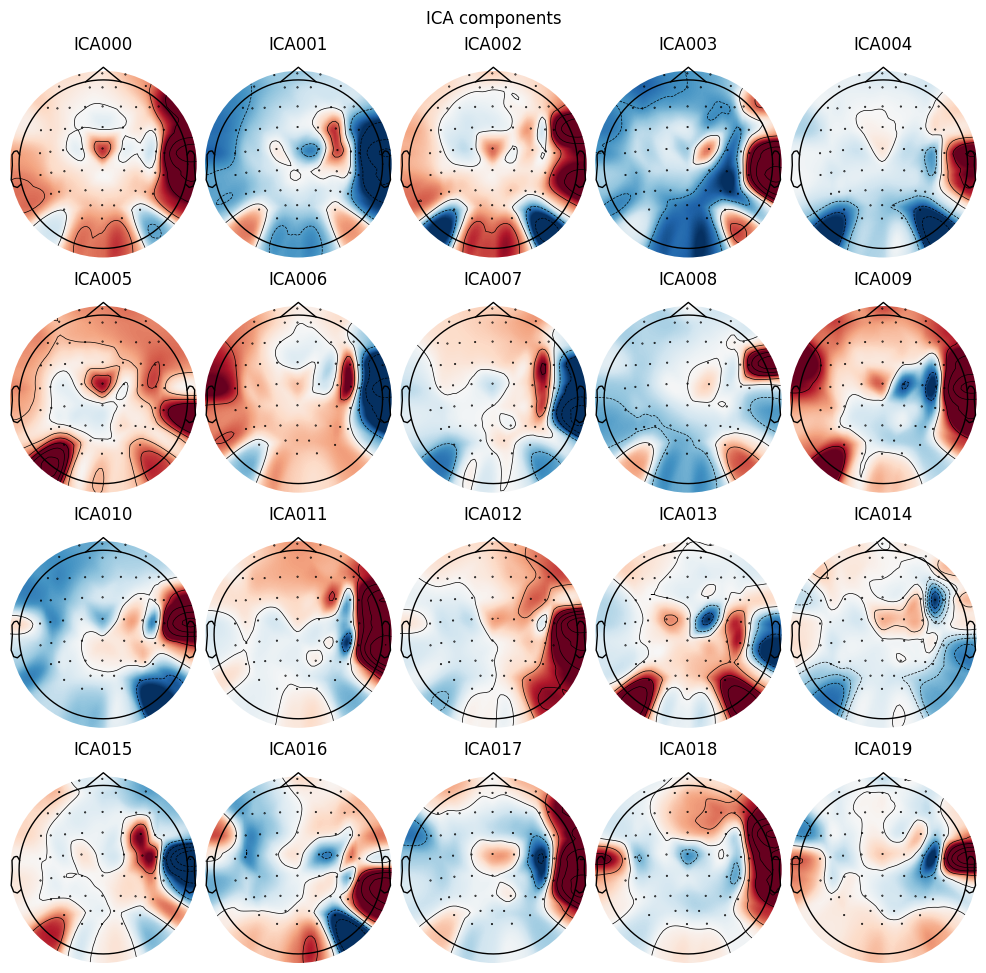

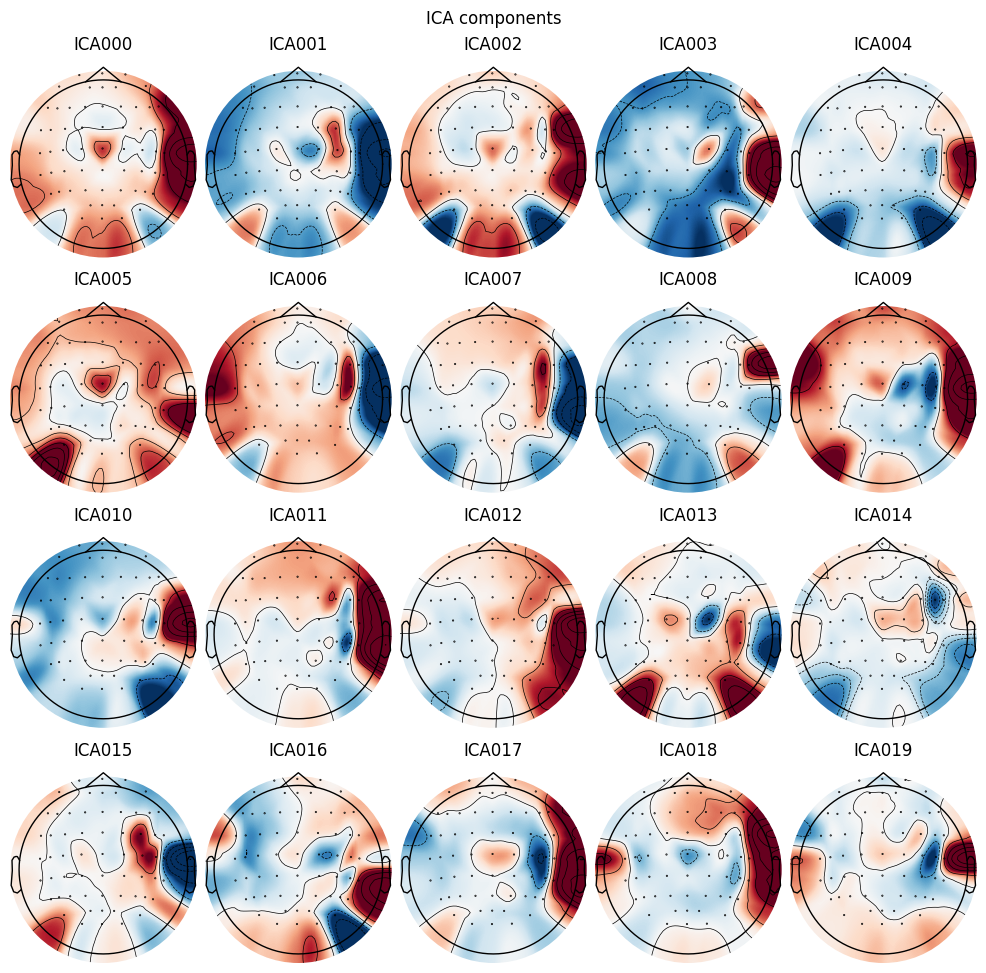

In [73]:
ica = mne.preprocessing.ICA(random_state=42, n_components=20)
ica.fit(raw_control.copy().filter(1,None, verbose=False), verbose=False)
ica.plot_components()

In [75]:
def plot_eeg_topomap(signal_array, save_path_animation=None, show_names=False, start_time=0.05, end_time=1, step_size=0.1):
    montage = mne.channels.make_standard_montage('standard_1020')

    ch_to_remove = []
    for ch in new_channels:
        if ch not in list(set(montage.ch_names).intersection(new_channels)):
            ch_to_remove.append(new_channels.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)

    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(new_channels)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)

    evoked.set_montage(montage)

    evoked.plot_topomap(np.arange(start_time, end_time, step_size), ch_type='eeg', time_unit='s', ncols=5, nrows=2, show_names=show_names);

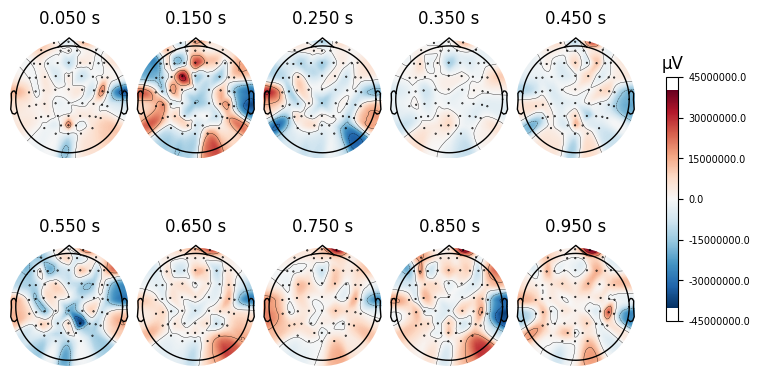

In [76]:
plot_eeg_topomap(signal_array_alcoholics, show_names=False)

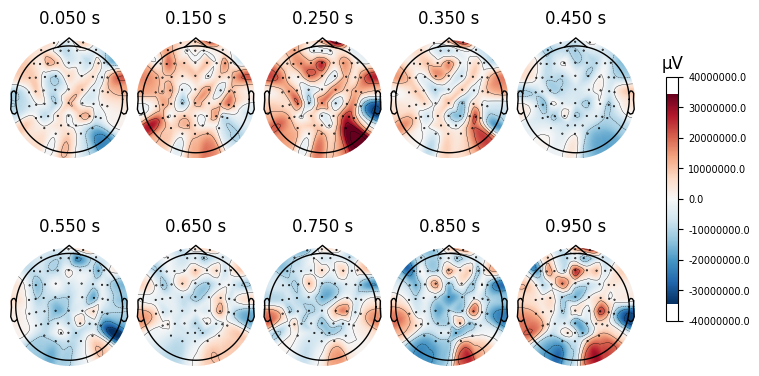

In [79]:
plot_eeg_topomap(signal_array_control, show_names=False)

# Plot a topographic map as an animation

In [80]:
def plot_eeg_topomap_animation(signal_array, save_path_animation, start_time=0.00, end_time=1, step_size=0.01, frame_rate=10):
    montage = mne.channels.make_standard_montage('standard_1020')
    ch_to_remove = []
    for ch in new_channels:
        if ch not in list(set(montage.ch_names).intersection(new_channels)):
            ch_to_remove.append(new_channels.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)

    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(new_channels)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)

    evoked.set_montage(montage)
    if save_path_animation:
        fig, anim = evoked.animate_topomap(times=np.arange(start_time, end_time, step_size), frame_rate=frame_rate, butterfly=True, blit=False, );
        anim.save(save_path_animation);
        print('saved to', save_path_animation)

MovieWriter imagemagick unavailable; using Pillow instead.


saved to dual_topomap_animation.gif


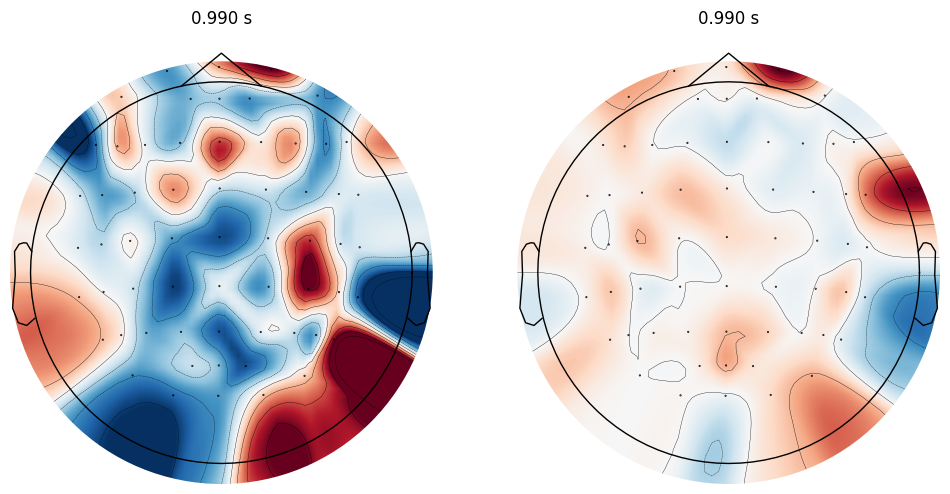

In [82]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

def plot_eeg_topomap_animation_dual(signal_array1, signal_array2, new_channels, save_path_animation, start_time=0.00, end_time=1, step_size=0.01, frame_rate=10):
    montage = mne.channels.make_standard_montage('standard_1020')
    ch_to_remove = []
    for ch in new_channels:
        if ch not in list(set(montage.ch_names).intersection(new_channels)):
            ch_to_remove.append(new_channels.index(ch))
    arr = np.delete(signal_array1.copy(), ch_to_remove, axis=0)

    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(new_channels)), sfreq=256, ch_types='eeg')
    evoked1 = mne.EvokedArray(arr, info)

    evoked1.set_montage(montage)

    montage = mne.channels.make_standard_montage('standard_1020')
    ch_to_remove = []
    for ch in new_channels:
        if ch not in list(set(montage.ch_names).intersection(new_channels)):
            ch_to_remove.append(new_channels.index(ch))
    arr = np.delete(signal_array2.copy(), ch_to_remove, axis=0)

    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(new_channels)), sfreq=256, ch_types='eeg')
    evoked2 = mne.EvokedArray(arr, info)

    evoked2.set_montage(montage)

    if save_path_animation:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        times = np.arange(start_time, end_time, step_size)

        def animate_func(time_idx):
            axes[0].cla()
            axes[1].cla()
            evoked1.plot_topomap(times=[times[time_idx]], axes=axes[0], show=False, colorbar=False)
            evoked2.plot_topomap(times=[times[time_idx]], axes=axes[1], show=False, colorbar=False)
            return axes

        anim = FuncAnimation(fig, animate_func, frames=len(times), interval=1000/frame_rate, blit=False)
        anim.save(save_path_animation, writer='imagemagick')
        print('saved to', save_path_animation)

plot_eeg_topomap_animation_dual(signal_array_control, signal_array_alcoholics, new_channels, 'dual_topomap_animation.gif')


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
inst is Evoked, setting `average=False`
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
inst is Evoked, setting `average=False`
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


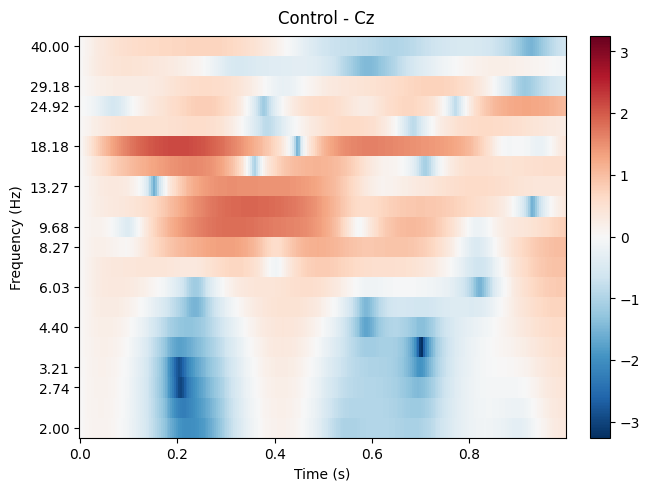

[<Figure size 640x480 with 2 Axes>]

In [83]:
import mne
import numpy as np

freqs = np.logspace(*np.log10([2, 40]), num=20)

n_cycles = freqs / 2.

power_alcoholic = mne.time_frequency.tfr_morlet(raw_alcoholic, freqs=freqs, n_cycles=n_cycles, return_itc=False)
power_control = mne.time_frequency.tfr_morlet(raw_control, freqs=freqs, n_cycles=n_cycles, return_itc=False)

power_control.plot([new_channels.index('Cz')], baseline=(None, 0), mode='logratio', title='Control - Cz')

Applying baseline correction (mode: logratio)


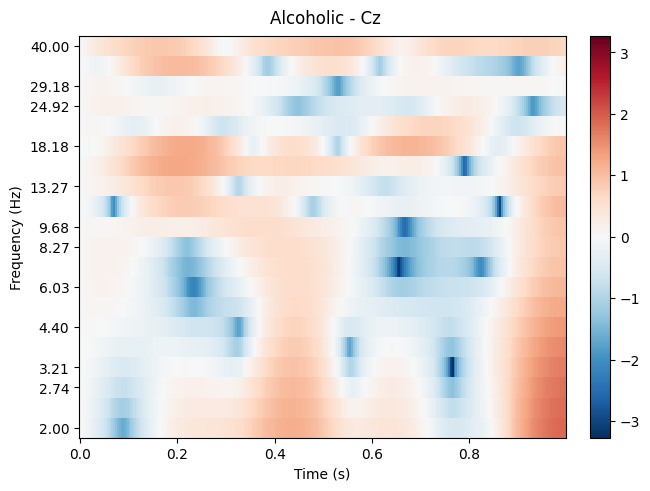

[<Figure size 640x480 with 2 Axes>]

In [84]:
power_alcoholic.plot([new_channels.index('Cz')], baseline=(None, 0), mode='logratio', title='Alcoholic - Cz')

In [87]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [90]:
def plot_psd(data, sfreq=256, average=False):
    info = mne.create_info(ch_names=new_channels, sfreq=sfreq, ch_types=['eeg']*len(new_channels))
    raw = mne.io.RawArray(data, info)
    raw.plot_psd(average=average)

Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Creating RawArray with float64 data, n_channels=64, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


C:\Users\Asia\AppData\Local\Temp\ipykernel_6396\1800955552.py:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=average)
c:\Users\Asia\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\Asia\AppData\Local\Temp\ipykernel_6396\1800955552.py:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(average=average)
c:\Users\Asia\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


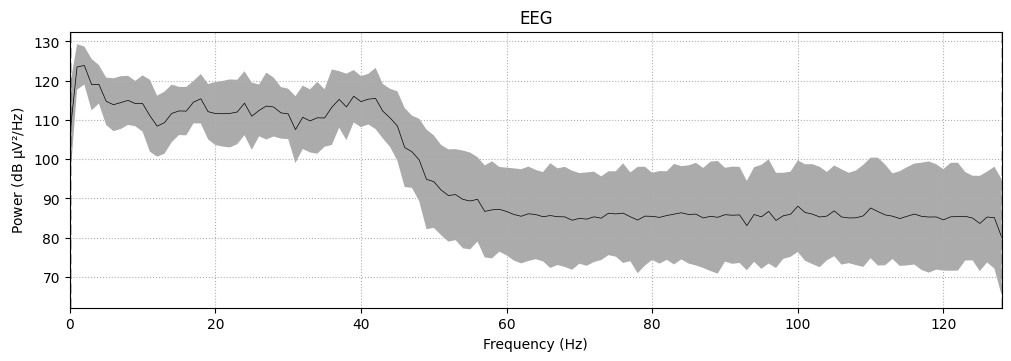

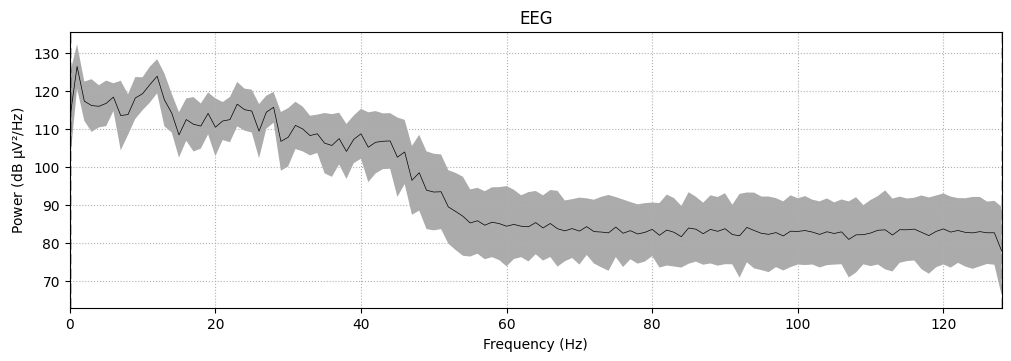

In [103]:
plot_psd(signal_array_alcoholics, sfreq=256, average=True)
plot_psd(signal_array_control, sfreq=256, average=True)